In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv(r"D:\Study\ML\cleaned_dataset_ML.csv")

In [3]:
df.head()

,track,artist,uri,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,chorus_hit,sections,target
0,Wild Things,Alessia Cara,spotify:track:2ZyuwVvV6Z3XJaXIFbspeE,0.741,0.626,1,-4.826,0,0.0886,0.02000,0.000,0.0828,0.706,108.029,188493,4,41.18681,10,1
1,Surfboard,Esquivel!,spotify:track:61APOtq25SCMuK0V5w2Kgp,0.447,0.247,5,-14.661,0,0.0346,0.87100,0.814,0.0946,0.250,155.489,176880,3,33.18083,9,0
2,Love Someone,Lukas Graham,spotify:track:2JqnpexlO9dmvjUMCaLCLJ,0.550,0.415,9,-6.557,0,0.0520,0.16100,0.000,0.1080,0.274,172.065,205463,4,44.89147,9,1
3,Music To My Ears (feat. Tory Lanez),Keys N Krates,spotify:track:0cjfLhk8WJ3etPTCseKXtk,0.502,0.648,0,-5.698,0,0.0527,0.00513,0.000,0.2040,0.291,91.837,193043,4,29.52521,7,0
4,Juju On That Beat (TZ Anthem),Zay Hilfigerrr & Zayion McCall,spotify:track:1lItf5ZXJc1by9SbPeljFd,0.807,0.887,1,-3.892,1,0.2750,0.00381,0.000,0.3910,0.780,160.517,144244,4,24.99199,8,1


In [4]:
features = df.drop(['track', 'artist', 'uri', 'target'], axis=1)
target = df['target']

In [5]:
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42, stratify=target)

In [6]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [7]:
def train_and_evaluate_model(model, X_train, y_train, X_test, y_test, model_name='Model'):
    print(f"--- Evaluating: {model_name} ---")
    
    # Train the model
    model.fit(X_train, y_train)
    
    # Make predictions
    y_pred = model.predict(X_test)
    
    # Evaluate the model
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Accuracy: {accuracy:.4f}")
    
    # Print detailed classification report
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))
    
    # Print and visualize the confusion matrix
    print("\nConfusion Matrix:")
    cm = confusion_matrix(y_test, y_pred)
    print(cm)
    
    # Plotting the confusion matrix
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Hit', 'Hit'], yticklabels=['Not Hit', 'Hit'])
    plt.title(f'Confusion Matrix for {model_name}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()
    
    print("-" * (20 + len(model_name)))
    print("\n")

--- Evaluating: Logistic Regression ---
Accuracy: 0.7937

Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.70      0.77       640
           1       0.75      0.89      0.81       640

    accuracy                           0.79      1280
   macro avg       0.80      0.79      0.79      1280
weighted avg       0.80      0.79      0.79      1280


Confusion Matrix:
[[449 191]
 [ 73 567]]


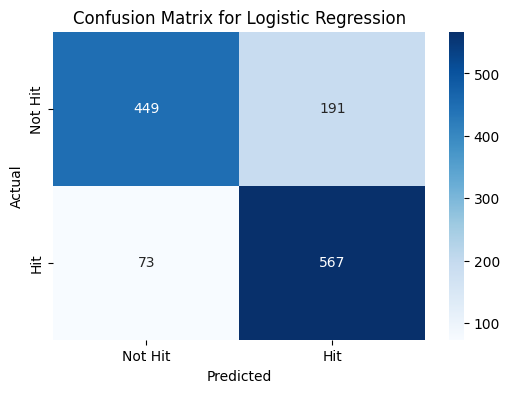

---------------------------------------




In [8]:
lr_model = LogisticRegression(random_state=42)
train_and_evaluate_model(lr_model, X_train_scaled, y_train, X_test_scaled, y_test, model_name='Logistic Regression')

--- Evaluating: Random Forest ---
Accuracy: 0.8445

Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.80      0.84       640
           1       0.82      0.89      0.85       640

    accuracy                           0.84      1280
   macro avg       0.85      0.84      0.84      1280
weighted avg       0.85      0.84      0.84      1280


Confusion Matrix:
[[514 126]
 [ 73 567]]


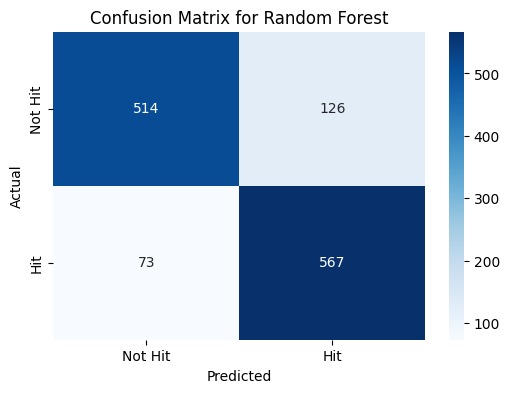

---------------------------------




In [9]:
rf_model = RandomForestClassifier(random_state=42)
train_and_evaluate_model(rf_model, X_train_scaled, y_train, X_test_scaled, y_test, model_name='Random Forest')

--- Evaluating: Gradient Boosting ---
Accuracy: 0.8422

Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.78      0.83       640
           1       0.81      0.90      0.85       640

    accuracy                           0.84      1280
   macro avg       0.85      0.84      0.84      1280
weighted avg       0.85      0.84      0.84      1280


Confusion Matrix:
[[500 140]
 [ 62 578]]


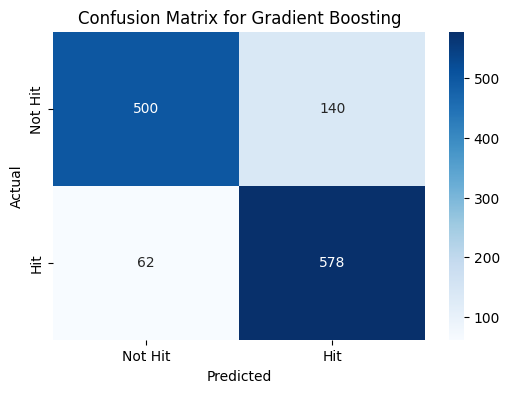

-------------------------------------




In [10]:
gb_model = GradientBoostingClassifier(random_state=42)
train_and_evaluate_model(gb_model, X_train_scaled, y_train, X_test_scaled, y_test, model_name='Gradient Boosting')

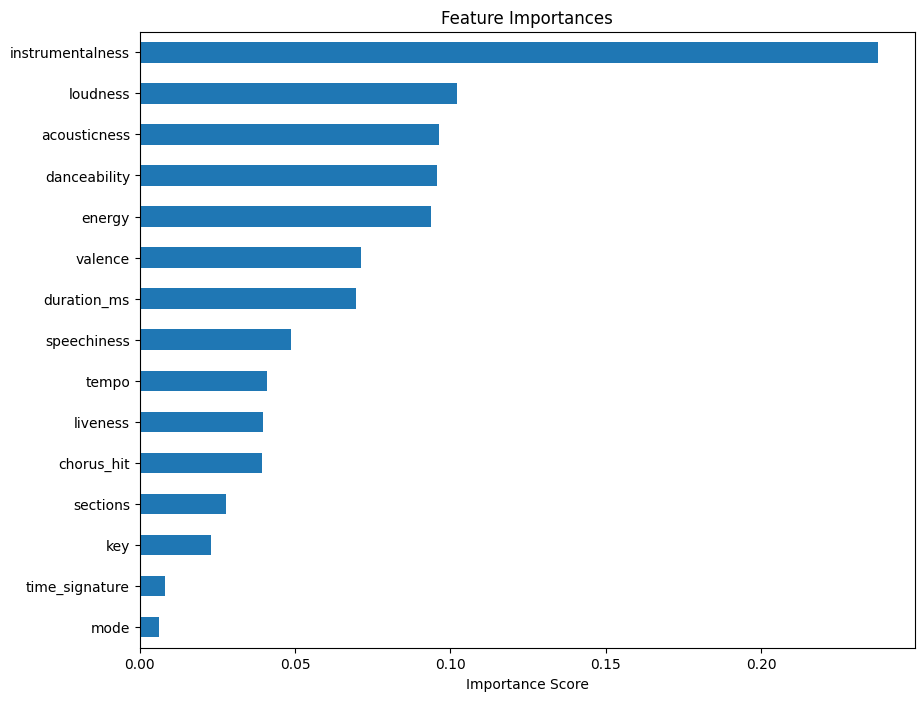

In [11]:
import pandas as pd
import matplotlib.pyplot as plt

importances = rf_model.feature_importances_
feature_names = features.columns

feature_importance_series = pd.Series(importances, index=feature_names).sort_values(ascending=True)

plt.figure(figsize=(10, 8))
feature_importance_series.plot(kind='barh') # Using a horizontal bar chart
plt.title('Feature Importances')
plt.xlabel('Importance Score')
plt.show()

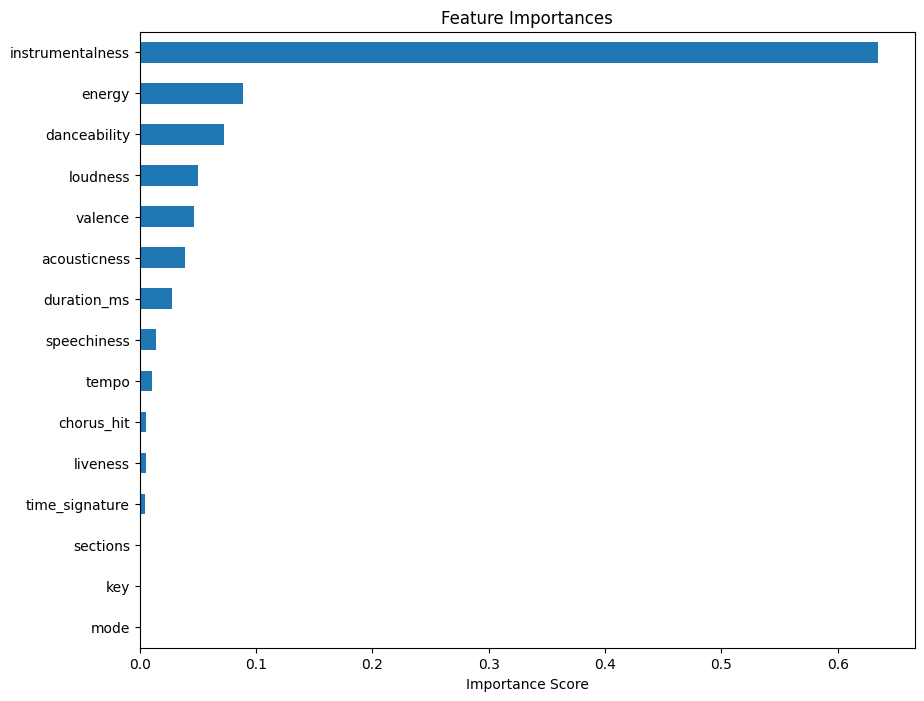

In [12]:
import pandas as pd
import matplotlib.pyplot as plt

importances = gb_model.feature_importances_
feature_names = features.columns

feature_importance_series = pd.Series(importances, index=feature_names).sort_values(ascending=True)

plt.figure(figsize=(10, 8))
feature_importance_series.plot(kind='barh') # Using a horizontal bar chart
plt.title('Feature Importances')
plt.xlabel('Importance Score')
plt.show()

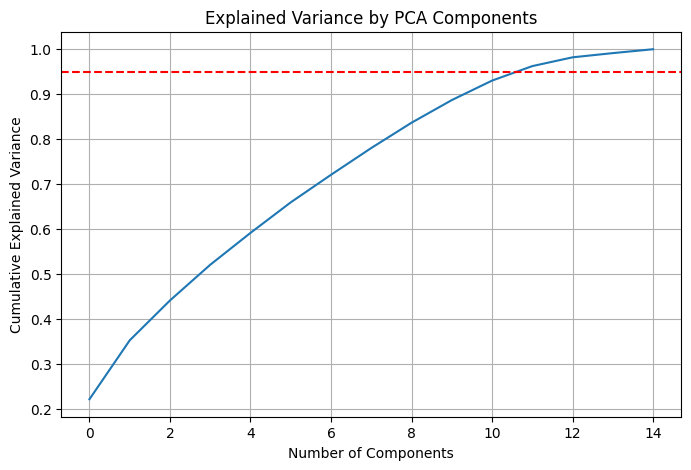

In [13]:
from sklearn.decomposition import PCA
import numpy as np
import matplotlib.pyplot as plt

pca_test = PCA()
pca_test.fit(X_train_scaled)

plt.figure(figsize=(8, 5))
plt.plot(np.cumsum(pca_test.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance by PCA Components')
plt.grid()
plt.axhline(y=0.95, color='r', linestyle='--') # Line for 95% variance
plt.show()

In [14]:
N_COMPONENTS = 9
pca = PCA(n_components=N_COMPONENTS)

X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

print(f"Original shape: {X_train_scaled.shape}")
print(f"Shape after PCA: {X_train_pca.shape}")

lr_pca_model = LogisticRegression(random_state=42)
lr_pca_model.fit(X_train_pca, y_train)

print("\n--- Model Evaluation after PCA ---")
y_pred_pca = lr_pca_model.predict(X_test_pca)
print(classification_report(y_test, y_pred_pca))

Original shape: (5118, 15)
Shape after PCA: (5118, 9)

--- Model Evaluation after PCA ---
              precision    recall  f1-score   support

           0       0.73      0.62      0.67       640
           1       0.67      0.77      0.72       640

    accuracy                           0.70      1280
   macro avg       0.70      0.70      0.70      1280
weighted avg       0.70      0.70      0.70      1280



In [15]:
N_COMPONENTS = 10
pca = PCA(n_components=N_COMPONENTS)

X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

rf_pca_model = RandomForestClassifier(random_state=42)
rf_pca_model.fit(X_train_pca, y_train)

print("\n--- Model Evaluation after PCA ---")
y_pred_pca = rf_pca_model.predict(X_test_pca)
print(classification_report(y_test, y_pred_pca))


--- Model Evaluation after PCA ---
              precision    recall  f1-score   support

           0       0.80      0.72      0.76       640
           1       0.74      0.82      0.78       640

    accuracy                           0.77      1280
   macro avg       0.77      0.77      0.77      1280
weighted avg       0.77      0.77      0.77      1280



In [16]:
N_COMPONENTS = 10
pca = PCA(n_components=N_COMPONENTS)

X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

gb_pca_model = GradientBoostingClassifier(random_state=42)
gb_pca_model.fit(X_train_pca, y_train)

print("\n--- Model Evaluation after PCA ---")
y_pred_pca = gb_pca_model.predict(X_test_pca)
print(classification_report(y_test, y_pred_pca))


--- Model Evaluation after PCA ---
              precision    recall  f1-score   support

           0       0.82      0.67      0.74       640
           1       0.72      0.85      0.78       640

    accuracy                           0.76      1280
   macro avg       0.77      0.76      0.76      1280
weighted avg       0.77      0.76      0.76      1280



--- Evaluating: XGBoost ---
Accuracy: 0.8398

Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.81      0.83       640
           1       0.82      0.87      0.85       640

    accuracy                           0.84      1280
   macro avg       0.84      0.84      0.84      1280
weighted avg       0.84      0.84      0.84      1280


Confusion Matrix:
[[516 124]
 [ 81 559]]


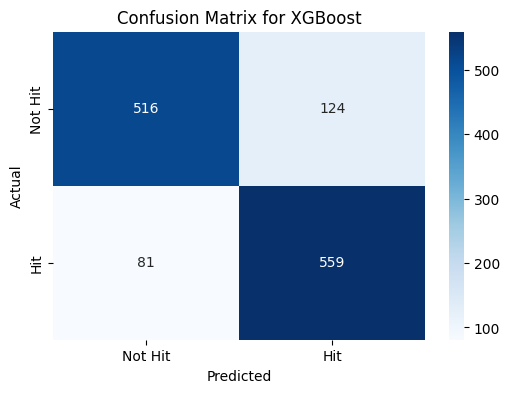

---------------------------




In [17]:
import xgboost as xgb
xgb_model = xgb.XGBClassifier(eval_metric='logloss', random_state=42)
train_and_evaluate_model(xgb_model, X_train_scaled, y_train, X_test_scaled, y_test, model_name='XGBoost')

--- Evaluating XGBoost with PCA Features ---
--- Evaluating: XGBoost with PCA ---
Accuracy: 0.7641

Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.71      0.75       640
           1       0.74      0.82      0.78       640

    accuracy                           0.76      1280
   macro avg       0.77      0.76      0.76      1280
weighted avg       0.77      0.76      0.76      1280


Confusion Matrix:
[[455 185]
 [117 523]]


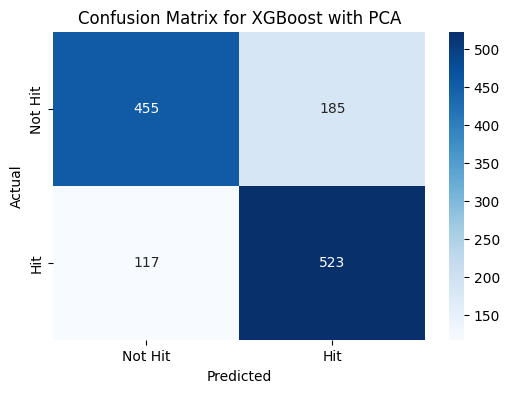

------------------------------------




In [18]:
print("--- Evaluating XGBoost with PCA Features ---")
train_and_evaluate_model(xgb_model, X_train_pca, y_train, X_test_pca, y_test, model_name='XGBoost with PCA')

In [19]:
from sklearn.model_selection import GridSearchCV
import xgboost as xgb

estimator = xgb.XGBClassifier(eval_metric='logloss', random_state=42)

param_grid = {
    'n_estimators': [100, 200, 300],         
    'max_depth': [3, 5, 7],                  
    'learning_rate': [0.05, 0.1, 0.2],       
    'subsample': [0.8, 1.0]                 
}


grid_search = GridSearchCV(
    estimator=estimator,
    param_grid=param_grid,
    scoring='f1',
    cv=5,
    n_jobs=-1,
    verbose=2
)


grid_search.fit(X_train_scaled, y_train)

print("\n--- Grid Search Complete ---")
print(f"Best F1-Score: {grid_search.best_score_:.4f}")
print("Best Parameters:", grid_search.best_params_)

best_xgb_model = grid_search.best_estimator_

Fitting 5 folds for each of 54 candidates, totalling 270 fits

--- Grid Search Complete ---
Best F1-Score: 0.8532
Best Parameters: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 200, 'subsample': 1.0}


In [20]:
df['dance_x_energy'] = df['danceability'] * df['energy']
df['dance_x_loudness'] = df['danceability'] * df['loudness']
df['acoustic_x_instrumental'] = df['acousticness'] * df['instrumentalness']

df['danceability_sq'] = df['danceability']**2
df['loudness_sq'] = df['loudness']**2

df['speech_to_acoustic'] = df['speechiness'] / (df['acousticness'] + 0.0001)

print(f"New shape after feature engineering: {df.shape}")

New shape after feature engineering: (6398, 25)


--- Evaluating: Tuned XGBoost with New Features ---
Accuracy: 0.8453

Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.80      0.84       640
           1       0.82      0.89      0.85       640

    accuracy                           0.85      1280
   macro avg       0.85      0.85      0.85      1280
weighted avg       0.85      0.85      0.85      1280


Confusion Matrix:
[[513 127]
 [ 71 569]]


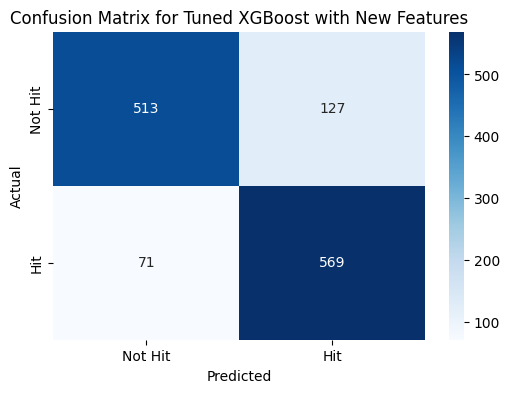

---------------------------------------------------




In [21]:
best_params = {
    'learning_rate': 0.1,
    'max_depth': 3,
    'n_estimators': 200,
    'subsample': 1.0
}

final_xgb_model = xgb.XGBClassifier(
    eval_metric='logloss',
    random_state=42,
    **best_params  
)

train_and_evaluate_model(
    final_xgb_model,
    X_train_scaled,
    y_train,
    X_test_scaled,
    y_test,
    model_name='Tuned XGBoost with New Features'
)

In [23]:
best_params = {
    'learning_rate': 0.1,
    'max_depth': 3,
    'n_estimators': 200,
    'subsample': 1.0
}
best_classifier_model = xgb.XGBClassifier(
    eval_metric='logloss',
    random_state=42,
    **best_params
)

df = pd.read_csv(r"D:\Study\ML\cleaned_dataset_ML.csv")
features = df.drop(['track', 'artist', 'uri', 'target'], axis=1)
target = df['target']

X_train, X_test, y_train, y_test = train_test_split(
    features, target, test_size=0.2, random_state=42, stratify=target
)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

best_classifier_model.fit(X_train_scaled, y_train)

print("\n--- Evaluating the Final Model on Test Data ---")
y_pred = best_classifier_model.predict(X_test_scaled)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))


--- Evaluating the Final Model on Test Data ---
Accuracy: 0.8453

Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.80      0.84       640
           1       0.82      0.89      0.85       640

    accuracy                           0.85      1280
   macro avg       0.85      0.85      0.85      1280
weighted avg       0.85      0.85      0.85      1280


Confusion Matrix:
[[513 127]
 [ 71 569]]


In [24]:
import joblib
joblib.dump(best_classifier_model, 'hit_classifier.joblib')
joblib.dump(scaler, 'scaler.joblib')

print("Successfully saved the *true* best model (85% F1) and its scaler.")

Successfully saved the *true* best model (85% F1) and its scaler.
